# **Netflix Data Visualization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing necessary libraries for data handling and visualization, including `pandas`, `matplotlib`, and `seaborn`.**


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

**Dataset used is `Netflix Movies and TV Shows` from Kaggle. It contains information about titles available on Netflix including type, rating, release year, country**

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**The first few rows of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#  Visualize missing values using a heatmap

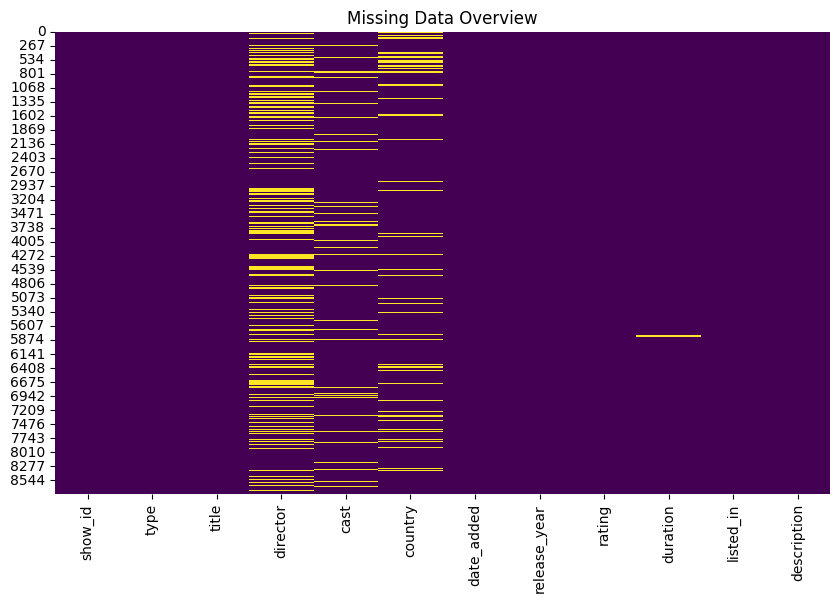

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Overview')
plt.show()

# Bar chart to visualize how many of the titles are Movies vs TV Shows on Netflix.

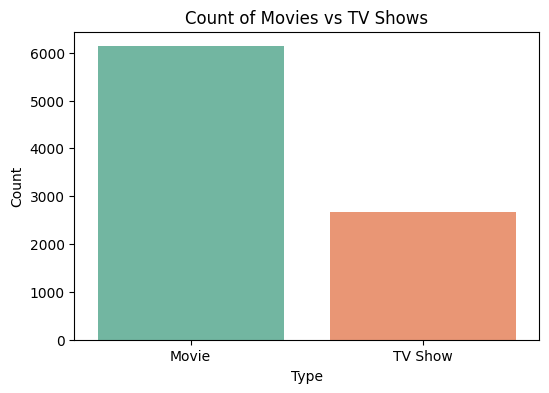

In [7]:
plt.figure(figsize=(6,4), dpi=100)
sns.countplot(data=df, x='type', palette='Set2')

plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Pie Chart for Ratings Distribution

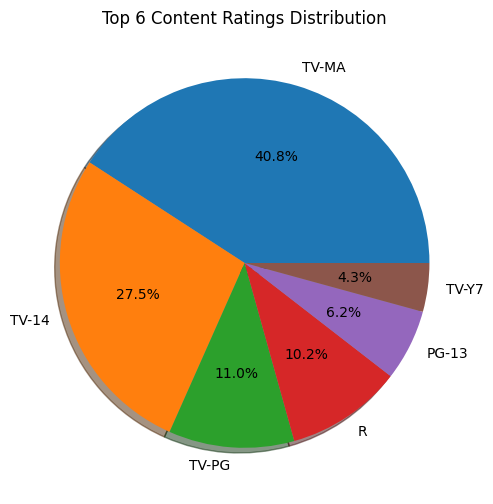

In [8]:
plt.figure(figsize=(8,6))
df['rating'].value_counts().head(6).plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Top 6 Content Ratings Distribution')
plt.ylabel('')
plt.show()

# Histogram for Movie Durations

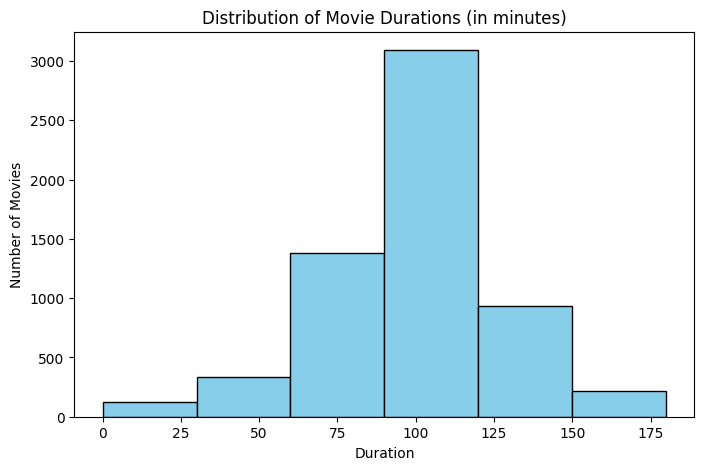

In [9]:
movie_durations = df[df['type'] == 'Movie']['duration'].dropna()
movie_durations = movie_durations.str.extract('(\d+)').dropna().astype(int)
plt.figure(figsize=(8,5))
plt.hist(movie_durations[0], bins=[0,30,60,90,120,150,180], color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()

#  Horizontal Bar Chart showing which countries contribute the most content to Netflix

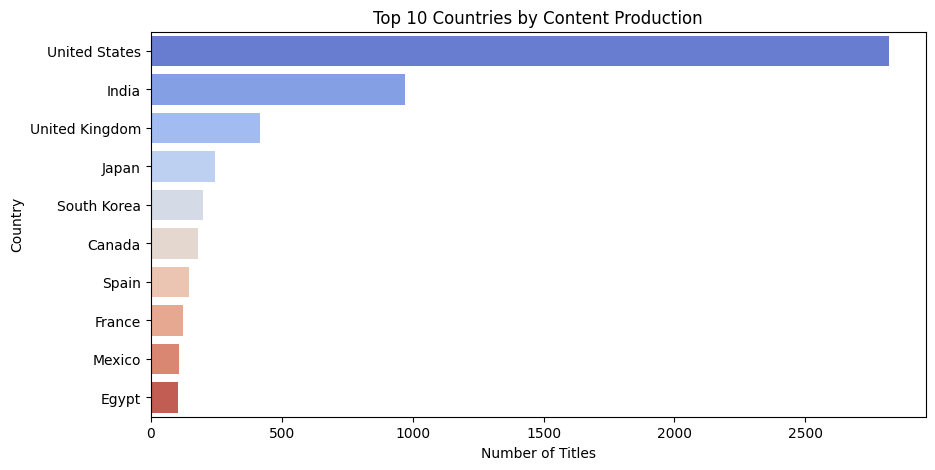

In [10]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

 # Boxplot for Year wise Addition of Content

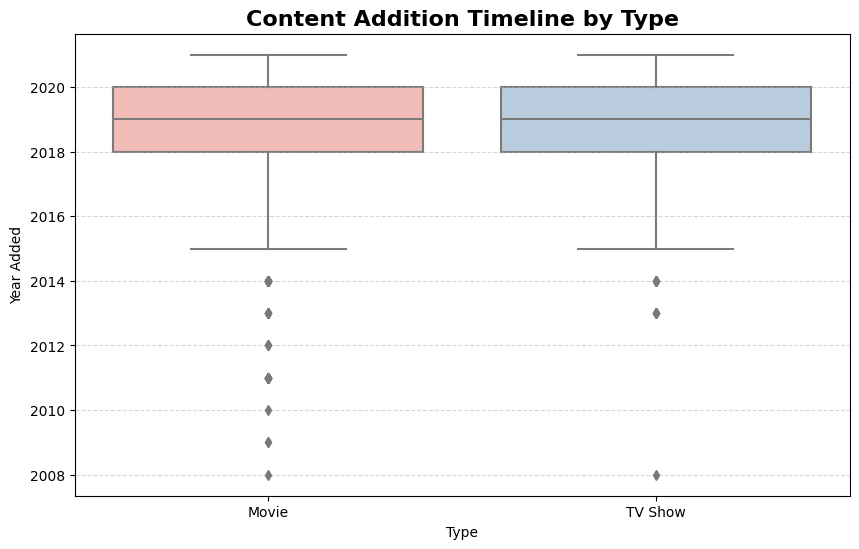

In [13]:
df['date_added'] = df['date_added'].astype(str).str.strip() 
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df_clean = df.dropna(subset=['year_added'])

plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df_clean, x='type', y='year_added', palette='Pastel1')

plt.title('Content Addition Timeline by Type', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Type')
plt.ylabel('Year Added')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# WORD CLOUD

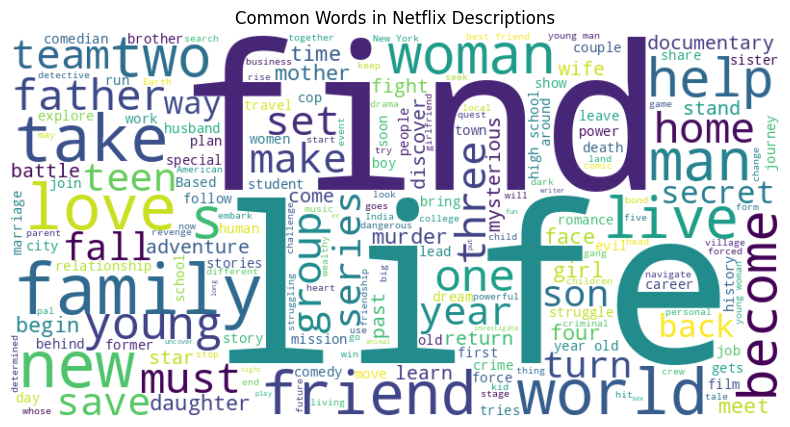

In [14]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(str(i) for i in df.description.dropna())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Netflix Descriptions')
plt.show()

# **CONCLUSION**

# The data visualization of Netflix’s content library reveals interesting patterns, such as the dominance of recently added content and the significant contribution from the U.S., both of which are clearly visible through the visual analysis above